### YOLO NAS

<img src = 'https://miro.medium.com/v2/resize:fit:1100/format:webp/1*11VfHXRB2KEefut1rrSy4g.png'>

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.7 MB/s eta 0:00:00


In [ ]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/166.8 GB disk)


In [ ]:
%%capture
!pip install super-gradients==3.1.3
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade

In [ ]:
!pip freeze

absl-py==1.4.0
aiohttp==3.8.5
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
annotated-types==0.5.0
antlr4-python3-runtime==4.9.3
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.4.1
arviz==0.15.1
astropy==5.3.2
astunparse==1.6.3
async-timeout==4.0.3
attrs==23.1.0
audioread==3.0.0
autograd==1.6.2
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blinker==1.4
blis==0.7.10
blosc2==2.0.0
bokeh==3.2.2
boto3==1.28.30
botocore==1.31.30
branca==0.6.0
build==0.10.0
CacheControl==0.13.1
cachetools==5.3.1
catalogue==2.0.9
certifi==2022.12.7
cffi==1.15.1
chardet==4.0.0
charset-normalizer==3.2.0
chex==0.1.7
click==8.1.6
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.2
cmdstanpy==1.1.0
colorcet==3.0.1
coloredlogs==15.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.1.1
cons==0.4.6
contextlib2==21.6.0
contourpy==1.1.0
convertdate==2.4.0
coverage==5.3.1
cryptography==41.0.3
cufflinks==0.17.3
c

In [ ]:
from super_gradients.training import models

yolo_nas_l = models.get("yolo_nas_l", pretrained_weights="coco")

The console stream is logged into /root/sg_logs/console.log


[2023-08-20 02:22:30] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-08-20 02:22:44] INFO - utils.py - NumExpr defaulting to 2 threads.
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-08-20 02:22:49] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-08-20 02:22:49] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-08-20 02:22:49] WARNING - export.py - Failed to import pytorch_quantization
[2023-08-20 02:22:49] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-08-20 02:22:52] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md


In [ ]:
!pip install torchinfo
from torchinfo import summary

summary(model=yolo_nas_l,
        input_size=(16, 3, 640, 640),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
YoloNAS_L (YoloNAS_L)                                             [16, 3, 640, 640]    [16, 8400, 4]        --                   True
├─NStageBackbone (backbone)                                       [16, 3, 640, 640]    [16, 96, 160, 160]   --                   True
│    └─YoloNASStem (stem)                                         [16, 3, 640, 640]    [16, 48, 320, 320]   --                   True
│    │    └─QARepVGGBlock (conv)                                  [16, 3, 640, 640]    [16, 48, 320, 320]   3,024                True
│    └─YoloNASStage (stage1)                                      [16, 48, 320, 320]   [16, 96, 160, 160]   --                   True
│    │    └─QARepVGGBlock (downsample)                            [16, 48, 320, 320]   [16, 96, 160, 160]   88,128               True
│    │    └─YoloNASCSPLayer (blocks)                     

In [ ]:
import cv2
import matplotlib.pyplot as plt

def show_jpg(url, title):
    # 이미지를 로드합니다.
    img = cv2.imread(url)

    # 이미지 크기 변경
    width = 1500
    height = 1000
    img_resized = cv2.resize(img, (width, height))

    # 이미지를 BGR에서 RGB로 변환합니다. (Matplotlib는 RGB 형식을 사용합니다.)
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # 이미지 크기 설정 (가로: 15인치, 세로: 10인치)
    plt.figure(figsize=(15, 10))

    # 이미지를 표시합니다.
    plt.imshow(img_rgb)
    plt.axis('off')  # 축을 제거하여 깔끔하게 표시합니다.
    plt.title(title, size = 20)
    plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt

def visualize_images_1x2(image_path_1, image_path_2):
    img1 = cv2.imread(image_path_1)
    img2 = cv2.imread(image_path_2)

    # 이미지 크기 변경
    width = 1000
    height = 800
    img1_resized = cv2.resize(img1, (width, height))
    img2_resized = cv2.resize(img2, (width, height))

    img1_rgb = cv2.cvtColor(img1_resized, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img1_rgb)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img2_rgb)
    plt.axis('off')

    plt.tight_layout()

    plt.show()


In [ ]:
from ultralytics import YOLO


In [ ]:
model = YOLO("/content/best.pt")
img1 = "https://images.food52.com/rXVXOeF9qPDQxUo5yMI5Qrplp1E=/fit-in/1200x1200/dd6b1621-4b08-4b52-88f9-a0b60e89816d--2020-1013_sponsored_LG_fridge_article-hero_3x2_rocky-luten_012.jpg"
img2 = 'https://media.witanddelight.com/content/uploads/2022/03/21143513/fridge-organization-1-1229x1536.jpg'

results = model.predict(img2, save=True, conf=0.25)



In [ ]:
yolov8x = YOLO('yolov8x.pt')
yolov8x.predict(img2, save=True, conf=0.25)


In [ ]:
result = yolo_nas_l.predict(img1, conf=0.25)
# # save option
result.save(output_folder="/content/nas_predic2", box_thickness=2, show_confidence=True)
# show_jpg('/content/nas_predict/pred_0.jpg')

[2023-07-31 11:06:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


### YOLO v8

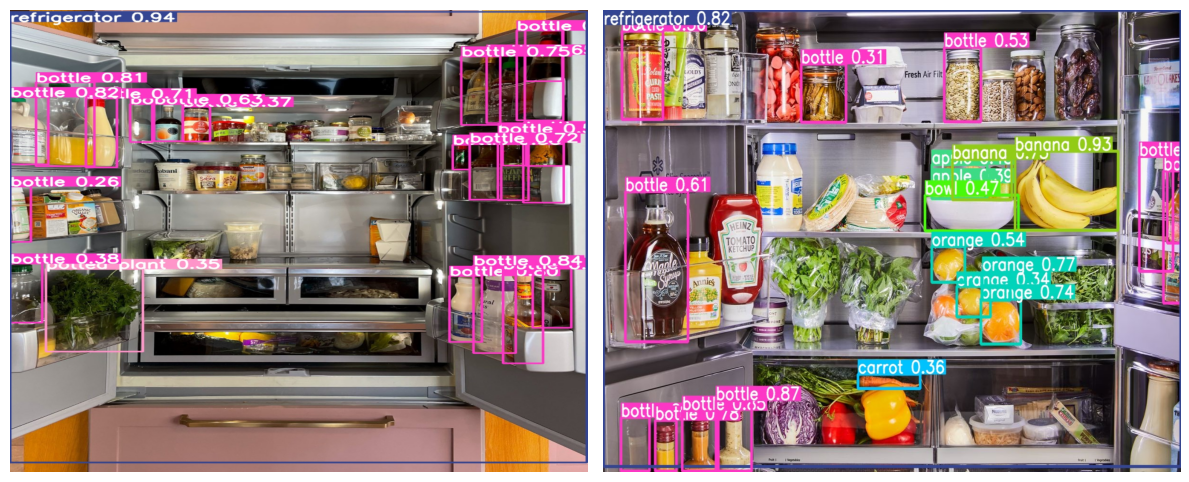

In [ ]:
url1 = '/content/runs/detect/predict10/fridge-organization-1-1229x1536.jpg'
url2 = '/content/runs/detect/predict5/dd6b1621-4b08-4b52-88f9-a0b60e89816d--2020-1013_sponsored_LG_fridge_article-hero_3x2_rocky-luten_012.jpg'
visualize_images_1x2(url1, url2)


### Best.pt

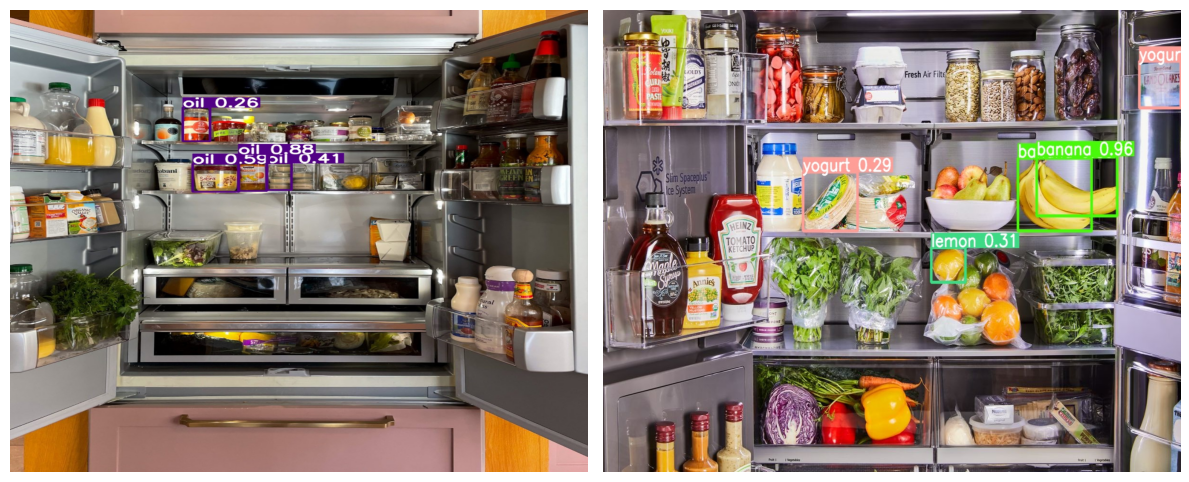

In [ ]:
# show_jpg('/content/runs/detect/predict3/dd6b1621-4b08-4b52-88f9-a0b60e89816d--2020-1013_sponsored_LG_fridge_article-hero_3x2_rocky-luten_012.jpg')

url1 = '/content/runs/detect/predict9/fridge-organization-1-1229x1536.jpg'
url2 = '/content/runs/detect/predict3/dd6b1621-4b08-4b52-88f9-a0b60e89816d--2020-1013_sponsored_LG_fridge_article-hero_3x2_rocky-luten_012.jpg'
visualize_images_1x2(url1, url2)

### YOLO Nas

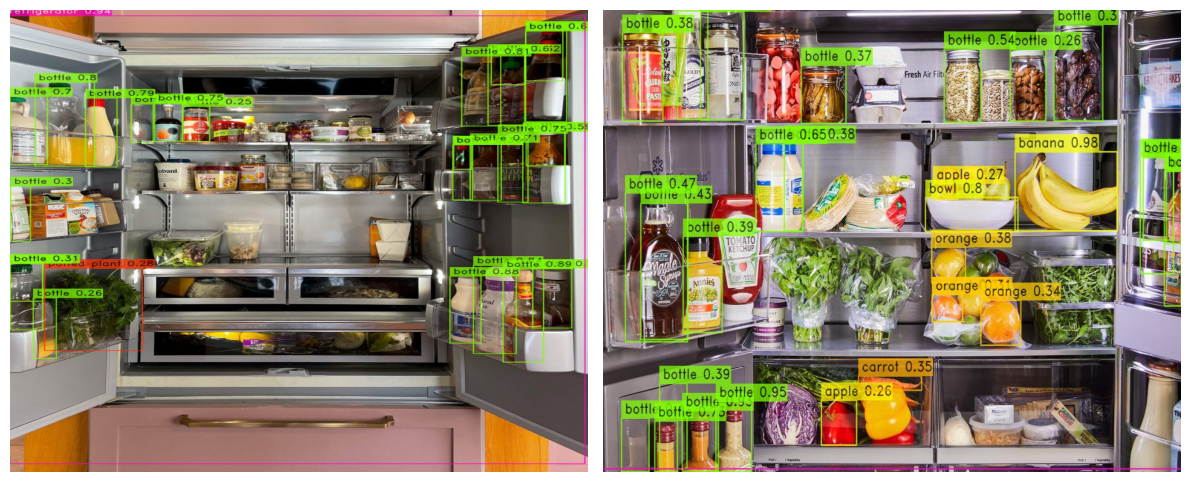

In [ ]:
url1 = '/content/nas_predict/pred_0.jpg'
url2 = '/content/nas_predic2/pred_0.jpg'
visualize_images_1x2(url1, url2)


### Human Detection

In [ ]:
human_cctv = 'https://aihub.or.kr/web-nas/aihub21/files/public/inline-images/%EB%8C%80%ED%91%9C%EB%8F%84%EB%A9%B4_1_1.png'
result = yolo_nas_l.predict(human_cctv, conf=0.25)
# # save option
result.save(output_folder="/content/nas_predic2", box_thickness=2, show_confidence=True)

[2023-08-20 02:26:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


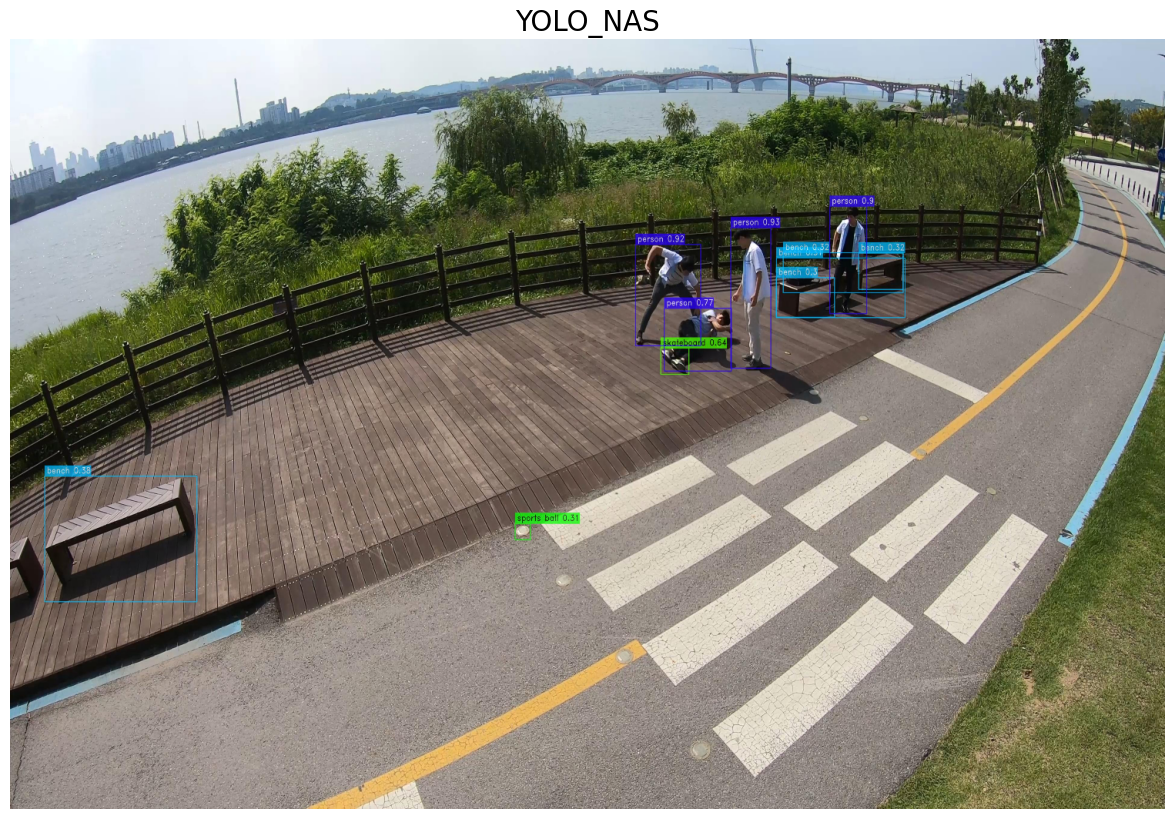

In [ ]:
nas_result = '/content/nas_predic2/pred_0.jpg'
show_jpg(nas_result, 'YOLO_NAS')

In [ ]:
yolov8x = YOLO('yolov8x.pt')


In [ ]:
yolov8x.predict(human_cctv, save=True, conf=0.25)

100%|██████████| 131M/131M [00:00<00:00, 180MB/s]

100%|██████████| 9.67M/9.67M [00:01<00:00, 6.78MB/s]


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couc

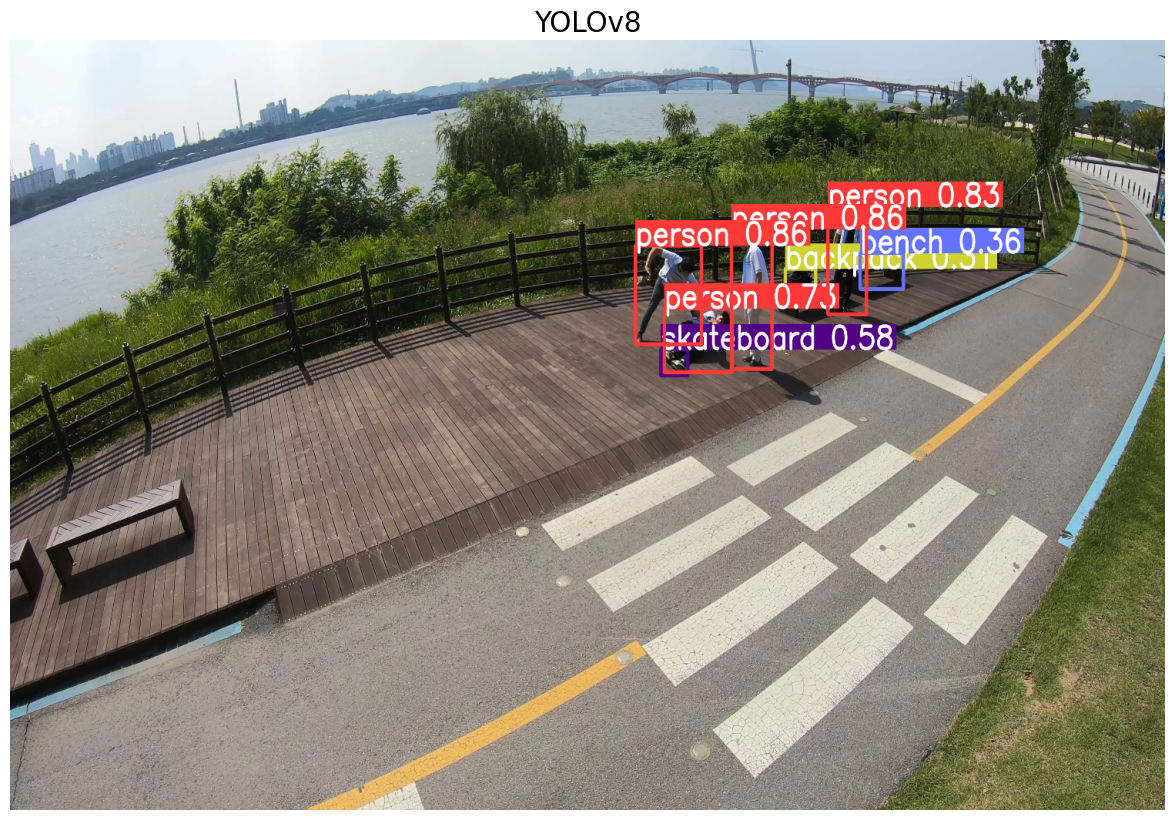

In [ ]:
v8_result = '/content/runs/detect/predict/대표도면_1_1.png'
show_jpg(v8_result, 'YOLOv8')

### YOLOv5 with CrowHuman Data

In [ ]:
!git clone https://github.com/deepakcrk/yolov5-crowdhuman.git

Cloning into 'yolov5-crowdhuman'...
remote: Enumerating objects: 5028, done.
remote: Total 5028 (delta 0), reused 0 (delta 0), pack-reused 5028
Receiving objects: 100% (5028/5028), 7.92 MiB | 12.47 MiB/s, done.
Resolving deltas: 100% (3420/3420), done.


In [ ]:
!pip install yolov5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.3/953.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 12.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=382ba681e439d256ba3dabaf0fed4f577daf2ab710ba0d7250bd64f1f5628809
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [ ]:
cd /content/yolov5-crowdhuman

/content/yolov5-crowdhuman


In [ ]:
#AttributeError: 'Upsample' object has no attribute 'recompute_scale_factor'
import torch.nn as nn

for m in model.modules():
    if isinstance(m, nn.Upsample):
        m.recompute_scale_factor = None



In [ ]:
cd  /content/yolov5-crowdhuman

/content/yolov5-crowdhuman


In [ ]:
!pip freeze

absl-py==1.4.0
aiohttp==3.8.5
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
annotated-types==0.5.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.4.1
arviz==0.15.1
astropy==5.3.2
astunparse==1.6.3
async-timeout==4.0.3
attrs==23.1.0
audioread==3.0.0
autograd==1.6.2
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blinker==1.4
blis==0.7.10
blosc2==2.0.0
bokeh==3.2.2
branca==0.6.0
build==0.10.0
CacheControl==0.13.1
cachetools==5.3.1
catalogue==2.0.9
certifi==2023.7.22
cffi==1.15.1
chardet==5.2.0
charset-normalizer==3.2.0
chex==0.1.7
click==8.1.6
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.1.1
cons==0.4.6
contextlib2==21.6.0
contourpy==1.1.0
convertdate==2.4.0
cryptography==41.0.3
cufflinks==0.17.3
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.11.0
cymem==2.0.7
Cython==0.29.36
dask==2023.8.0
datascience==0

In [ ]:
import pkg_resources
installed_packages = pkg_resources.working_set
installed_packages_list = sorted(["%s==%s" % (i.key, i.version)
     for i in installed_packages])
print(installed_packages_list)

['absl-py==1.4.0', 'aiohttp==3.8.5', 'aiosignal==1.3.1', 'alabaster==0.7.13', 'albumentations==1.3.1', 'altair==4.2.2', 'annotated-types==0.5.0', 'anyio==3.7.1', 'appdirs==1.4.4', 'argon2-cffi-bindings==21.2.0', 'argon2-cffi==23.1.0', 'array-record==0.4.1', 'arviz==0.15.1', 'astropy==5.3.2', 'astunparse==1.6.3', 'async-timeout==4.0.3', 'attrs==23.1.0', 'audioread==3.0.0', 'autograd==1.6.2', 'babel==2.12.1', 'backcall==0.2.0', 'beautifulsoup4==4.11.2', 'bleach==6.0.0', 'blinker==1.4', 'blis==0.7.10', 'blosc2==2.0.0', 'bokeh==3.2.2', 'branca==0.6.0', 'build==0.10.0', 'cachecontrol==0.13.1', 'cachetools==5.3.1', 'catalogue==2.0.9', 'certifi==2023.7.22', 'cffi==1.15.1', 'chardet==5.2.0', 'charset-normalizer==3.2.0', 'chex==0.1.7', 'click-plugins==1.1.1', 'click==8.1.6', 'cligj==0.7.2', 'cloudpickle==2.2.1', 'cmake==3.27.2', 'cmdstanpy==1.1.0', 'colorcet==3.0.1', 'colorlover==0.3.0', 'community==1.0.0b1', 'confection==0.1.1', 'cons==0.4.6', 'contextlib2==21.6.0', 'contourpy==1.1.0', 'conver

In [ ]:
from importlib import metadata
metadata.metadata('opencv-python')['4.8.0.76']

In [ ]:
cd /content/yolov5-crowdhuman

/content/yolov5-crowdhuman


In [ ]:
!pip install thop

In [ ]:
import requests

video_url = 'https://github.com/bryanyzhu/tiny-ucf101/raw/master/abseiling_k400.mp4'
response = requests.get(video_url)

# 다운로드한 영상을 저장할 파일 경로
video_filename = 'abseiling_k400.mp4'

# 영상 파일 저장
with open(video_filename, 'wb') as f:
    f.write(response.content)

print(f'영상 다운로드 완료: {video_filename}')


영상 다운로드 완료: abseiling_k400.mp4


In [ ]:
!python detect.py --weights crowdhuman_yolov5m.pt --source abseiling_k400.mp4

Namespace(weights=['crowdhuman_yolov5m.pt'], source='abseiling_k400.mp4', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, person=False, heads=False)
YOLOv5 v4.0-114-g285bd44 torch 2.0.1+cu118 CPU

Fusing layers... 
Model Summary: 308 layers, 21041679 parameters, 0 gradients
video 1/1 (1/250) /content/yolov5-crowdhuman/abseiling_k400.mp4: Traceback (most recent call last):
  File "/content/yolov5-crowdhuman/detect.py", line 183, in <module>
    detect()
  File "/content/yolov5-crowdhuman/detect.py", line 72, in detect
    pred = model(img, augment=opt.augment)[0]
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1501, in _call_impl
    return forward_call(*args, **kwargs)
  File "/content/yolov5-crowdhuman/models/yolo.py", line 118, in forward
    return self.forward_once(x, profile)  

In [ ]:
!python3 detect.py --weights crowdhuman_yolov5m.pt --source 대표도면_1_1.png --view-img  --person


Namespace(weights=['crowdhuman_yolov5m.pt'], source='대표도면_1_1.png', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, person=True, heads=False)
Traceback (most recent call last):
  File "/content/yolov5-crowdhuman/detect.py", line 175, in <module>
    check_requirements()
  File "/content/yolov5-crowdhuman/utils/general.py", line 92, in check_requirements
    pkg_resources.require(requirements)  # DistributionNotFound or VersionConflict exception if requirements not met
  File "/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py", line 966, in require
    needed = self.resolve(parse_requirements(requirements))
  File "/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py", line 827, in resolve
    dist = self._resolve_dist(
  File "/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__

### 비디오 예측

In [ ]:
import requests

video_url = 'https://github.com/bryanyzhu/tiny-ucf101/raw/master/abseiling_k400.mp4'
response = requests.get(video_url)

# 다운로드한 영상을 저장할 파일 경로
video_filename = 'abseiling_k400.mp4'

# 영상 파일 저장
with open(video_filename, 'wb') as f:
    f.write(response.content)

print(f'영상 다운로드 완료: {video_filename}')

In [ ]:
!yolo task=detect mode=predict model=yolov8x source=abseiling_k400.mp4 conf=0.4 save=True


100% 131M/131M [00:00<00:00, 228MB/s]
Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs

video 1/1 (1/250) /content/yolov5-crowdhuman/abseiling_k400.mp4: 384x640 1 person, 107.9ms
video 1/1 (2/250) /content/yolov5-crowdhuman/abseiling_k400.mp4: 384x640 1 person, 49.3ms
video 1/1 (3/250) /content/yolov5-crowdhuman/abseiling_k400.mp4: 384x640 1 person, 49.3ms
video 1/1 (4/250) /content/yolov5-crowdhuman/abseiling_k400.mp4: 384x640 1 person, 1 elephant, 49.3ms
video 1/1 (5/250) /content/yolov5-crowdhuman/abseiling_k400.mp4: 384x640 1 person, 42.7ms
video 1/1 (6/250) /content/yolov5-crowdhuman/abseiling_k400.mp4: 384x640 1 person, 32.4ms
video 1/1 (7/250) /content/yolov5-crowdhuman/abseiling_k400.mp4: 384x640 1 person, 33.1ms
video 1/1 (8/250) /content/yolov5-crowdhuman/abseiling_k400.mp4: 384x640 1 person, 1 elephant, 33.1ms
video 1/1 (9/250) /content/yolov5-crowdhuman

In [ ]:
yolov8x.val()

Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients
val: Scanning /content/datasets/coco/labels/val2017.cache... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 3/313 [00:04<07:35,  1.47s/it]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [04:30<00:00,  1.16it/s]
                   all       5000      36335      0.737      0.646      0.706      0.539
                person       5000      10777      0.827      0.768      0.848      0.644
               bicycle       5000        314      0.732      0.583      0.665      0.432
                   car       5000       1918      0.756      0.682      0.753      0.537
            motorcycle

loading annotations into memory...
Done (t=1.86s)
creating index...
index created!
Loading and preparing results...
DONE (t=5.47s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=56.66s).
Accumulating evaluation results...
DONE (t=10.93s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.537
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.709
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.586
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.356
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.591
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.706
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.397
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.657
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDe

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78d8f9beebc0>
fitness: 0.5555978772852002
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.64368,      0.4316,     0.53676,     0.55214,     0.79125,     0.77751,     0.79291,     0.48993,     0.35722,     0.32868,     0.76903,     0.73315,     0.56319,     0.36641,     0.44009,     0.82643,     0.76007,     0.73054,     0.65291,     0.66418,     0.76189,     0.81248,      0.7804,     0.80622,
       

In [ ]:
results = yolov8x.predict(source="abseiling_k400.mp4", conf=0.4, save=True, classes = 0)




    WARNING ⚠️ stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/250) /content/yolov5-crowdhuman/abseiling_k400.mp4: 384x640 1 person, 63.4ms
video 1/1 (2/250) /content/yolov5-crowdhuman/abseiling_k400.mp4: 384x640 1 person, 63.3ms
video 1/1 (3/250) /content/yolov5-crowdhuman/abseiling_k400.mp4: 384x640 1 person, 63.8ms
video 1/1 (4/250) /content/yolov5-crowdhuman/abseiling_k400.mp4: 384x640 1 person, 63.0ms
video 1/1 (5/250) /content/yolov5-crowdhuman/abseiling_k400.mp4: 384x640 1 person, 36.5ms
video 1/1

In [ ]:
pip install -U kora

In [ ]:
import os

def convert_avi_to_mp4(avi_file_path, output_name):
    os.popen("ffmpeg -i '{input}' -ac 2 -b:v 2000k -c:a aac -c:v libx264 -b:a 160k -vprofile high -bf 0 -strict experimental -f mp4 '{output}.mp4'".format(input = avi_file_path, output = output_name))
    return True

In [ ]:
convert_avi_to_mp4('runs/detect/predict5/abseiling_k400.avi', 'abseiling_k400_person_predict')

True

In [ ]:
from kora.drive import upload_public

convert_avi_to_mp4('runs/detect/predict7/abseiling_k400.avi', 'abseiling_k400_person_predict_v8')
video_path = '/content/yolov5-crowdhuman/abseiling_k400_person_predict_v8.mp4'

url = upload_public(video_path)
# then display it
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

In [ ]:
result = yolo_nas_l.predict('abseiling_k400.mp4', conf=0.25).save('runs/detect')

Predicting Video: 100%|██████████| 250/250 [00:05<00:00, 44.04it/s]
[2023-08-20 06:36:09] INFO - video.py - Output path "runs/detect" does not have a video extension, and therefore will be saved as runs/detect.mp4


In [ ]:
from kora.drive import upload_public

# convert_avi_to_mp4('/content/yolov5-crowdhuman/runs/detect.mp4', 'yolo_nas_predict2')

video_path = '/content/yolov5-crowdhuman/yolo_nas_predict2.mp4'

url = upload_public(video_path)
# then display it
HTML(f"""<video src={url} width=500 controls/>""")

In [ ]:
for result in results :
	class_names = result.class_names
	labels = result.prediction.labels
	confidence = result.prediction.confidence
	bboxes = result.prediction.bboxes_xyxy

	for i, (label, conf, bbox) in enumerate(zip(labels, confidence, bboxes)):
	    print("prediction: ", i)
	    print("label_id: ", label)
	    print("label_name: ", class_names[int(label)])
	    print("confidence: ", conf)
	    print("bbox: ", bbox)
	    print("--" * 10)

prediction:  0
label_id:  3.0
label_name:  motorcycle
confidence:  0.2878418
bbox:  [     227.95      112.09      256.84      143.67]
--------------------
prediction:  1
label_id:  0.0
label_name:  person
confidence:  0.28442383
bbox:  [     230.88      103.44       256.4      139.06]
--------------------
prediction:  0
label_id:  0.0
label_name:  person
confidence:  0.2890625
bbox:  [     227.68      103.01      255.07       140.2]
--------------------
prediction:  1
label_id:  0.0
label_name:  person
confidence:  0.2836914
bbox:  [     239.26      103.12      255.35         139]
--------------------
prediction:  0
label_id:  0.0
label_name:  person
confidence:  0.2866211
bbox:  [     227.58      103.02      256.72      140.58]
--------------------
prediction:  1
label_id:  0.0
label_name:  person
confidence:  0.27416992
bbox:  [      239.8       102.7      277.73      168.67]
--------------------
prediction:  2
label_id:  0.0
label_name:  person
confidence:  0.27270508
bbox:  [     2

In [ ]:
yolov5()

In [ ]:
results = yolov8x.predict(source="abseiling_k400.mp4", conf=0.4, save=True, classes = 0)
